In [71]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import tensorflow as tf
import os
import cv2
from tensorflow.keras import layers,models
from tensorflow.keras.models import load_model
from tensorflow.keras.callbacks import EarlyStopping,ReduceLROnPlateau

In [72]:
data=np.zeros((20000,128,128))
label=np.zeros((20000,10))
count=0
l=0

for files in os.listdir("leapGestRecog/leapGestRecog"):
    l=-1
    for file in os.listdir("leapGestRecog/leapGestRecog/"+files):
        l+=1
        for im in os.listdir("leapGestRecog/leapGestRecog/"+files+"/"+file):
            img = plt.imread("leapGestRecog/leapGestRecog/"+files+"/"+file+"/"+im)
            img_t=cv2.resize(img,dsize=(128,128))
            data[count]=img_t
            label[count][l]=1
            count+=1
    
    
    

In [73]:
list=["palm","L","fist","fist_move","thumb","index","ok","palm_mouve","C","down"]

In [74]:
idx=np.random.permutation(data.shape[0])

In [75]:
train=np.copy(data)
lab=np.copy(label)
train,lab=train[idx],lab[idx]

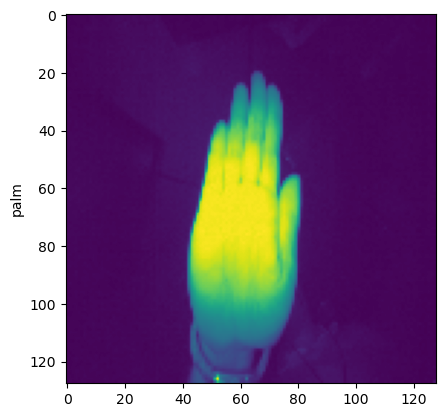

In [91]:
j=17500
plt.imshow(train[j])
plt.ylabel(list[lab[j].argmax()])
plt.show()

In [77]:
x_train=train[:15000]
y_train=lab[:15000]
x_valid=train[15000:17500]
y_valid=lab[15000:17500]
x_test=train[17500:20000]
y_test=lab[17500:20000]

In [78]:
input_shape=(128,128,1)

In [79]:
cnn=models.Sequential([
    
    layers.Conv2D(filters=16,kernel_size=(3,3),activation='relu',input_shape=input_shape),
    layers.BatchNormalization(),
    layers.MaxPooling2D(),
    layers.Conv2D(filters=32,kernel_size=(3,3),activation='relu'),
    layers.BatchNormalization(),
    layers.MaxPooling2D(),
    layers.Conv2D(filters=64,kernel_size=(3,3),activation='relu'),
    layers.BatchNormalization(),
    layers.MaxPooling2D(),
    layers.Conv2D(filters=128,kernel_size=(3,3),activation='relu'),
    layers.BatchNormalization(),
    layers.MaxPooling2D(),
    
    layers.Flatten(),
    layers.Dense(30,activation='relu'),
    layers.Dense(10,activation='softmax')]
)

In [80]:
cnn.compile(optimizer=tf.keras.optimizers.Adam(0.0001),loss='categorical_crossentropy',metrics=['accuracy'])

In [81]:
callbacks=[
    ReduceLROnPlateau(monitor='val_loss',factor=0.1,patience=2),
    EarlyStopping(monitor='val_loss',patience=5,restore_best_weights=False)
]

In [82]:
epochs=10

In [83]:
cnn.fit(x_train,y_train,
        epochs=epochs,
        validation_data=(x_valid,y_valid),
        callbacks=callbacks
       )

Epoch 1/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 73s 142ms/step - accuracy: 0.7425 - loss: 0.8792 - val_accuracy: 0.3728 - val_loss: 2.0049 - learning_rate: 1.0000e-04
Epoch 2/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 67s 143ms/step - accuracy: 0.9991 - loss: 0.0143 - val_accuracy: 0.9988 - val_loss: 0.0098 - learning_rate: 1.0000e-04
Epoch 3/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 68s 144ms/step - accuracy: 1.0000 - loss: 0.0040 - val_accuracy: 0.9996 - val_loss: 0.0049 - learning_rate: 1.0000e-04
Epoch 4/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 68s 145ms/step - accuracy: 1.0000 - loss: 0.0018 - val_accuracy: 0.9996 - val_loss: 0.0035 - learning_rate: 1.0000e-04
Epoch 5/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 68s 146ms/step - accuracy: 1.0000 - loss: 0.0010 - val_accuracy: 0.9996 - val_loss: 0.0026 - learning_rate: 1.0000e-04
Epoch 6/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 68s 145ms/step - accuracy: 1.0000 - loss: 6.5627e-04 - val_accuracy: 0.9996 - val_loss: 0.0022 - learning_rate: 1.0000e-04
Epoch 7/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 68

In [84]:
cnn.evaluate(x_test,y_test)

79/79 ━━━━━━━━━━━━━━━━━━━━ 2s 27ms/step - accuracy: 0.9999 - loss: 5.9471e-04


[0.0015607861569151282, 0.9995999932289124]

In [85]:
y_predict=cnn.predict(x_test)

79/79 ━━━━━━━━━━━━━━━━━━━━ 3s 29ms/step


In [98]:
def plot(n):
    fig=plt.figure(figsize=(16,16))
    c=4
    r=8
    ax=[]
    for i in range(1,c*r+1):
        j=(32*n)+i
        ax.append(fig.add_subplot(8,4,i))
        for i in range(len(list)):
            if(y_predict[j].argmax()==i):
                if(y_test[j].argmax()==i):
                    ax[-1].yaxis.label.set_color('green')
                    plt.ylabel(list[y_predict[j].argmax()])
                else:
                    ax[-1].yaxis.label.set_color('red')
                    plt.ylabel(list[y_predict[j].argmax()])
            plt.imshow(x_test[j])
    plt.show()

In [ ]:
for i in range(int(x_test.shape[0]/32)):
    plot(i)